In [63]:
import pandas
# load the dataset
dataset = pandas.read_csv('textWithTag.csv')
del dataset['Unnamed: 0']
dataset.head()

,fileName,fileText,tags
0,43,Reverse Engineering of Biological Complexity M...,parsimony; 2002; robustness; systems biology; ...
1,44,insight review articles\n\nExploring complex n...,bistability; network; complex networks; networ...
2,47,insight review articles\n\nExploring complex n...,search; web graph; small world; navigation; mo...
3,99,letters to nature\ntypically slower than 1 km ...,bistability; clustering; network; network dyna...
4,101,Network Motifs: Simple Building Blocks of Comp...,protein protein; link analysis; web graph; 200...


In [23]:
# import sys
# print(sys.path)

['C:\\Users\\vieta\\NLP', 'C:\\Users\\vieta\\Miniconda3\\python37.zip', 'C:\\Users\\vieta\\Miniconda3\\DLLs', 'C:\\Users\\vieta\\Miniconda3\\lib', 'C:\\Users\\vieta\\Miniconda3', '', 'C:\\Users\\vieta\\Miniconda3\\lib\\site-packages', 'C:\\Users\\vieta\\Miniconda3\\lib\\site-packages\\win32', 'C:\\Users\\vieta\\Miniconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\vieta\\Miniconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\vieta\\Miniconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\vieta\\.ipython']


In [6]:
#Fetch wordcount for each abstract
dataset['word_count'] = dataset['fileText'].apply(lambda x: len(str(x).split(" ")))
dataset[['fileText','word_count']].head()

,fileText,word_count
0,Reverse Engineering of Biological Complexity M...,7557
1,insight review articles\n\nExploring complex n...,9262
2,insight review articles\n\nExploring complex n...,9262
3,letters to nature\ntypically slower than 1 km ...,3863
4,Network Motifs: Simple Building Blocks of Comp...,4767


In [7]:
##Descriptive statistics of word counts
dataset.word_count.describe()

count      182.000000
mean      6896.543956
std       6510.682568
min        865.000000
25%       4361.500000
50%       5503.000000
75%       7249.000000
max      67220.000000
Name: word_count, dtype: float64

In [8]:
#Identify common words
freq = pandas.Series(' '.join(dataset['fileText']).split()).value_counts()[:20]
freq

the     55918
of      46278
and     30642
in      22942
to      20107
a       17894
for     11239
is      10699
that    10616
with     7976
The      7800
are      7725
by       7419
from     6057
as       5727
be       5479
on       5430
et       4282
or       3823
at       3739
dtype: int64

In [9]:
#Identify uncommon words
unFreq =  pandas.Series(' '.join(dataset 
         ['fileText']).split()).value_counts()[-20:]
unFreq

Sep                       1
infringements             1
-469                      1
Schwidder,                1
Muzny28,                  1
detection:                1
Grouping                  1
Elkin4,                   1
1.8,                      1
YM,                       1
triangle)                 1
censor                    1
2003;140:1-51.            1
1651                      1
P55).                     1
me''                      1
electrophysiologically    1
sandbox                   1
187:117­143.              1
yeast10                   1
dtype: int64

In [10]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

lem = WordNetLemmatizer()
stem = PorterStemmer()

word = "inversely"

print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

stemming: invers
lemmatization: inversely


In [11]:
#Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer

#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

In [12]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))

##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

In [13]:
corpus = []
for i in range(len(dataset)):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', dataset['fileText'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [21]:
#View corpus item
corpus[0]

'reverse engineering biological complexity marie e csete et al science doi science following resource related article available online www sciencemag org information current may updated information service including high resolution figure found online version article http www sciencemag org cgi content full supporting online material found http www sciencemag org cgi content full dc article cite article accessed free http www sciencemag org cgi content full otherarticles article cited article isi web science article cited article hosted highwire press see http www sciencemag org cgi content full otherarticles article appears following subject collection cell biology http www sciencemag org cgi collection cell biol information obtaining reprint article obtaining permission reproduce article whole part found http www sciencemag org permission dtl science print issn online issn published weekly except last week december american association advancement science york avenue nw washington dc

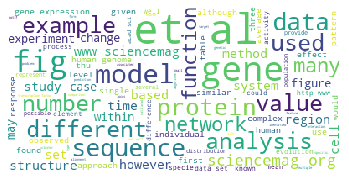

In [15]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(background_color='white', stopwords=stop_words, max_words=100, max_font_size=50, random_state=42).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
import re

cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [17]:
list(cv.vocabulary_.keys())[:10]

['reverse',
 'engineering',
 'biological',
 'complexity',
 'marie',
 'following',
 'resource',
 'article',
 'online',
 'sciencemag']

[Text(0, 0, 'gene'),
 Text(0, 0, 'al'),
 Text(0, 0, 'et'),
 Text(0, 0, 'genome'),
 Text(0, 0, 'sequence'),
 Text(0, 0, 'protein'),
 Text(0, 0, 'network'),
 Text(0, 0, 'human'),
 Text(0, 0, 'data'),
 Text(0, 0, 'fig'),
 Text(0, 0, 'nature'),
 Text(0, 0, 'cell'),
 Text(0, 0, 'model'),
 Text(0, 0, 'science'),
 Text(0, 0, 'number'),
 Text(0, 0, 'analysis'),
 Text(0, 0, 'www'),
 Text(0, 0, 'region'),
 Text(0, 0, 'expression'),
 Text(0, 0, 'may')]

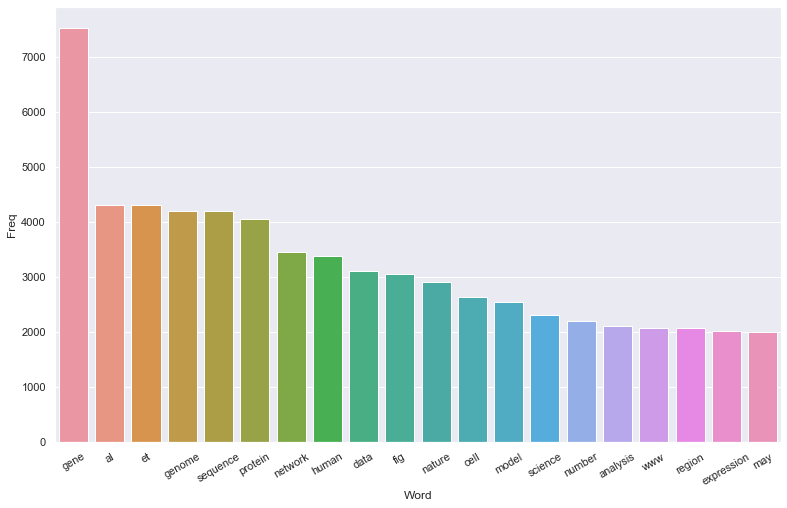

In [18]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pandas.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                      Bi-gram  Freq
0                       et al  4274
1              sciencemag org   966
2              www sciencemag   963
3             gene expression   724
4                human genome   684
5                    http www   598
6                    data set   579
7                    acad sci   507
8        transcription factor   503
9                   natl acad   486
10                  proc natl   484
11                    org cgi   439
12          nature publishing   435
13           publishing group   435
14                 nature vol   422
15                    org may   405
16             downloaded www   403
17               nucleic acid   371
18                 nature com   369
19  supplementary information   361


[Text(0, 0, 'et al'),
 Text(0, 0, 'sciencemag org'),
 Text(0, 0, 'www sciencemag'),
 Text(0, 0, 'gene expression'),
 Text(0, 0, 'human genome'),
 Text(0, 0, 'http www'),
 Text(0, 0, 'data set'),
 Text(0, 0, 'acad sci'),
 Text(0, 0, 'transcription factor'),
 Text(0, 0, 'natl acad'),
 Text(0, 0, 'proc natl'),
 Text(0, 0, 'org cgi'),
 Text(0, 0, 'nature publishing'),
 Text(0, 0, 'publishing group'),
 Text(0, 0, 'nature vol'),
 Text(0, 0, 'org may'),
 Text(0, 0, 'downloaded www'),
 Text(0, 0, 'nucleic acid'),
 Text(0, 0, 'nature com'),
 Text(0, 0, 'supplementary information')]

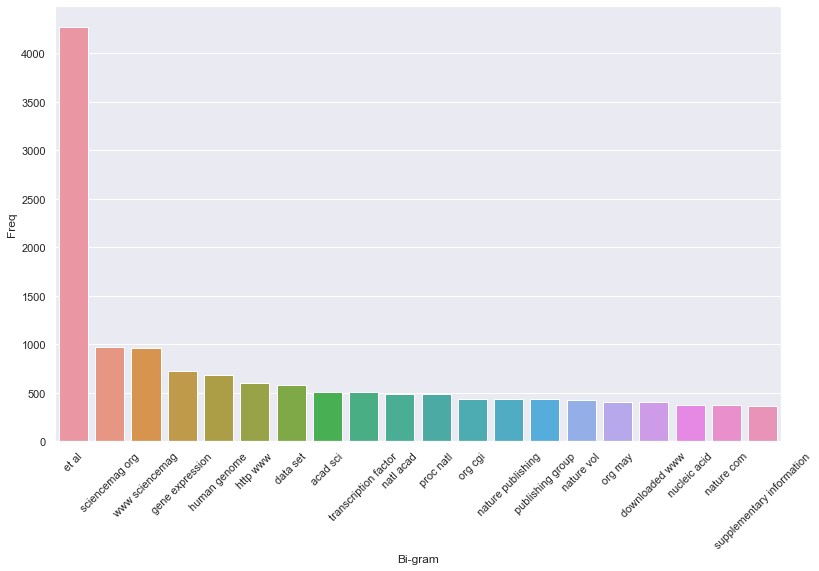

In [19]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top2_words = get_top_n2_words(corpus, n=20)
top2_df = pandas.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)

#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                       Tri-gram  Freq
0            www sciencemag org   963
1                 natl acad sci   486
2                proc natl acad   484
3       nature publishing group   435
4                www nature com   348
5                  acad sci usa   348
6            sciencemag org cgi   341
7              cgi content full   326
8               org cgi content   320
9           http www sciencemag   316
10              nucleic acid re   293
11           sciencemag org may   289
12    downloaded www sciencemag   287
13            nature com nature   211
14               www genome org   194
15        draft genome sequence   191
16           org downloaded www   174
17                et al science   169
18  protein protein interaction   164
19           cold spring harbor   161


[Text(0, 0, 'www sciencemag org'),
 Text(0, 0, 'natl acad sci'),
 Text(0, 0, 'proc natl acad'),
 Text(0, 0, 'nature publishing group'),
 Text(0, 0, 'www nature com'),
 Text(0, 0, 'acad sci usa'),
 Text(0, 0, 'sciencemag org cgi'),
 Text(0, 0, 'cgi content full'),
 Text(0, 0, 'org cgi content'),
 Text(0, 0, 'http www sciencemag'),
 Text(0, 0, 'nucleic acid re'),
 Text(0, 0, 'sciencemag org may'),
 Text(0, 0, 'downloaded www sciencemag'),
 Text(0, 0, 'nature com nature'),
 Text(0, 0, 'www genome org'),
 Text(0, 0, 'draft genome sequence'),
 Text(0, 0, 'org downloaded www'),
 Text(0, 0, 'et al science'),
 Text(0, 0, 'protein protein interaction'),
 Text(0, 0, 'cold spring harbor')]

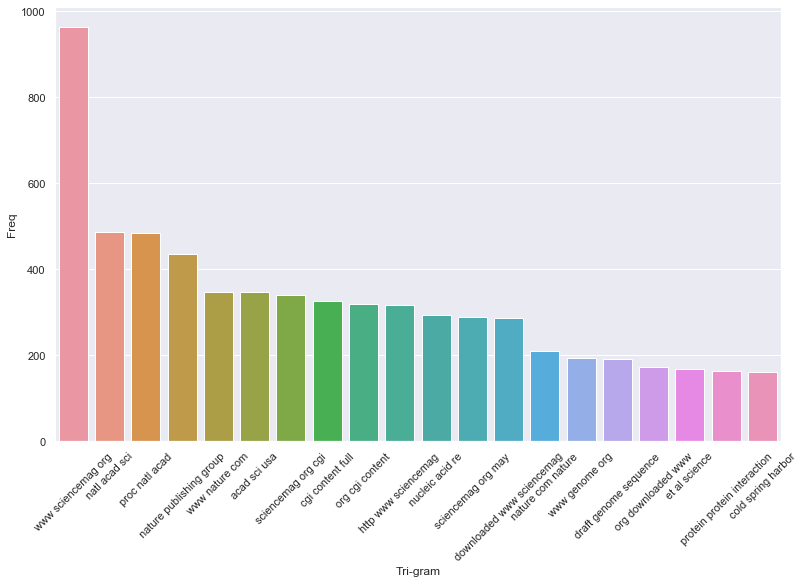

In [20]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top3_words = get_top_n3_words(corpus, n=20)
top3_df = pandas.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)

#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [69]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)# get feature names
feature_names=cv.get_feature_names()

In [82]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

# function to get accuracy of 1 doc
def getAccuracy(pos):
    count = 0
    # fetch document for which keywords needs to be extracted
    doc=corpus[pos]

    #generate tf-idf for the given document
    tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())
    #extract only the top n; n here is 20
    keywords=extract_topn_from_vector(feature_names,sorted_items,20)
    
    for k in keywords:
        if k in dataset.loc[pos, 'tags']:
            count+=1
    
    return count*100/len(dataset.loc[pos, 'tags'].split(';'))
    
# total accuracy of all doc
totalAccuracy = 0

for i in range(len(dataset)):
    totalAccuracy += getAccuracy(i)
 
# now print the results
# print("\nFile Text:")
# print(doc[0:100])
# print("\nKeywords:")
# for k in keywords:
#     print(k,keywords[k])

In [84]:
totalAccuracy/182

30.016493666006586

# Try with RaKe (Kaggle)

In [93]:
from rake_nltk import Rake

def get_keywords_rake(docs, n=20):
    # Uses stopwords for english from NLTK, and all puntuation characters by default
    r = Rake()
    
    # Extraction given the text.
    r.extract_keywords_from_text(docs)
    
    # To get keyword phrases ranked highest to lowest.
    keywords = r.get_ranked_phrases()[0:n]
    
    return keywords

def getAccuracyRaKe(pos):
    count = 0
    # fetch document for which keywords needs to be extracted
    doc=corpus[pos]

    #extract only the top n; n here is 10
    keywords = get_keywords_rake(doc, n=20)
    
    for k in keywords:
        if k in dataset.loc[pos, 'tags']:
            count+=1
    
    return count*100/len(dataset.loc[pos, 'tags'].split(';'))

def print_results_RaKe(pos):
    # now print the results
    print("\n=====Title=====")
    print(df['title'][idx])
    print("\n=====Abstract=====")
    print(df['abstract'][idx])
    print("\n===Keywords===")
    for k in keywords:
        print(k)

In [95]:
get_keywords_rake(dataset.loc[0, 'fileText'])

['org science vol 295 1 march 2002 1667 downloaded',
 'org science vol 295 1 march 2002 1669 downloaded',
 'org science vol 295 1 march 2002 1665 downloaded',
 '1668 1 march 2002 vol 295 science www',
 '1666 1 march 2002 vol 295 science www',
 'flipping signs typically creates exponentially growing instabilities ),',
 '1664 1 march 2002 vol 295 science www',
 'lift l clav2 must offset total weight w',
 'anderson et al ., nucleic acids res',
 'von dassow et al ., nature 406',
 'regulated lego robot would require extensive reverse engineering',
 'bile ducts causes toxic bile acids',
 'yoo et al ., pacific symposium',
 'imoto et al ., pacific symposium',
 'ideker et al ., pacific symposium',
 'otherwise intact control system could cause wild',
 'drug administration may one day mandate simulation',
 'dickinson et al ., science 288',
 'chu et al ., science 282',
 'burns et al ., science 282']

# Try with TextRank by Gensim

In [96]:
import gensim

In [120]:
def get_keywords_TextRank(doc):
    keywords=gensim.summarization.keywords(doc,
                                           ratio=None,
                                           words=20,
                                           split=True,
                                           scores=True,
                                           pos_filter=None,
                                           lemmatize=True,
                                           deacc=True)
    return keywords

def getAccuracyTextRank(pos):
    count = 0
    # fetch document for which keywords needs to be extracted
    doc=corpus[pos]

    #extract only the top n; n here is 10
    keywords = get_keywords_TextRank(doc)
    
    for k in keywords:
        if k in dataset.loc[pos, 'tags']:
            count+=1
    
    return count*100/len(dataset.loc[pos, 'tags'].split(';'))

def print_results_TextRank(pos):
    # now print the results
    print("\n=====Title=====")
    print(dataset['fileName'][pos])
    print("\n===Keywords===")
    for k in keywords:
        print(k)
#         print(keywords[k])

In [101]:
# total accuracy of all doc
totalAccuracyTextRank = 0

for i in range(len(dataset)):
    totalAccuracyTextRank += getAccuracyTextRank(i)

In [102]:
totalAccuracyTextRank

3515.820865535814

In [103]:
totalAccuracyTextRank/182

19.317697063383594

In [121]:
get_keywords_TextRank(corpus[0])
print_results_TextRank(0)


=====Title=====
43

===Keywords===
runoff
climate
land
precipitation
radiation
aerosol
continental
surface
co
clim
water
modelled
century
effect
change
moses
land use
cloud
river
trend


In [118]:
dataset.loc[0, 'tags']

'parsimony; 2002; robustness; systems biology; network; emergenc; biology; engineering; systems; design; biological model; modeling; review; networks; cell; control; metabolism; complexity; intro; emergence; regulatory network'

In [119]:
for k in keywords:
    if k in dataset.loc[0, 'tags']:
        print('Y')

Y
